# Using Deep Learning to Develop a Poker Playing AI

* Since artificial intelligence has been created it has been used to play a variety of strategic games such as chess, checkers, and even poker.
* A lot of games provide information to the player that they can then use to respond by; Example: Flappy bird, you can gauge the distance from the pipe, where the gap is, where your bird is, etc. Flappy bird has "Perfect information".
* Not all games have perfect information. Card games are notorious for having "imperfect information", which the most common is not being able to know what cards are in your opponents hand.
* Our goal is to create a model that can analyze poker environments; and decide what the best move is at any given state so that we can maximize the amount of winning hands
* Poker is interesting because it's a relatively straightforward rule-set, but due to the abundance of "imperfect information", there is a great amount of skill involved in Poker, despite what people might think about Poker being a game of luck.
* We are using the Leduc Hold'em ruleset.

# Leduc Hold'em Ruleset

* Each player has a single card in hand
* Cards in deck: 2 jacks, 2 queens, 2 kings
* There is one "community card"
* Players take turns calling,raising or folding
* Eventually time comes to check each players card
 * If a player has a card matching the community card - They win
 * If both players match - Draw
 * If neither players match - highest card wings (Jack < Queen < King)
 * If neither players match but they have the same card - Draw


 # Why Leduc?
 * Initially we wanted to use Limit Texas Hold'em. During testing we found that the environment, amount of players, and the possible combinations of cards resulted in egregiously long training times.
 * Our experience + The time constraints we had = Leduc Hold'em being better


# Overview of Past and Current Solution Ideas

## State-of-the-Art Solutions

* The highest performing models that take on the no-limit betting information sets handle sets of order 10^161 for 2 player hands, this number is more than the number of atoms in the universe squared (Noam Brown). When compared to the limited betting information set of 10^14 the no-limit betting models are much more complex
* Poker can be "solved" by having a neural network map probability based on every combination of given hands + community cards. This would utilize a very large data set and a long amount of training time.
* One of the highest performing models for the no limit betting environments uses a hybrid of the nueroevolutionary and reinforcement learning models that they call NE_RL.
* Poker playing AI's were essentially solved by using the Counterfactual Regret method.
* DQN methods of playing poker bare less results than CFR, but CFR is a tree sampling method, while DQN uses neural networks.

##Why not CFR?
* Relies on playing towards Nash Equilibrium (NE).
* Nash Equilibrium is a set of strategies in which no player can improve by deviating from their strategy, reaching the NE in a 2 player zero sum game would mean we are guaranteed to not lose in expectation.
* Since Minimax cannot be applied to info-states in non perfect information games such as poker, CFR has been determined to be an effective method of traversing the state tree.
* CFR picks an action proportional to the positive regret of that action, with all regrets beginning at 0. Regret increases by the difference of what a player could have recieved from choosing an action versus what they actually recieved for the action they chose. Leads to an exponential increase in complexity as the depth of trees become larger. Updates regrets individually, per player basis on each iteration.
* By doing this, as the number of iterations approaches infinity, the average strategy playerd over all iterations will converge to NE.(At a rate of O(1/e^2) at a theoretical bound. As such, the algorithm needs a large amount of iterations.



## Solution Ideas from Journal and Conference Papers


* Regret Minimization in Game with Incomplete Information by Zinkevich
 * Train models by playing against each other and assigning tree's of REGRET after each game. The goal is to minimize the amount of regret.
 * These models learn by NE-RL or the genetic algorithm. Essentially models are randomly created, and are tested on the environment. The most fit model is selected as the "reproducer" where the next set of models to be tested will be copied from the most fit model, with slight random changes.

 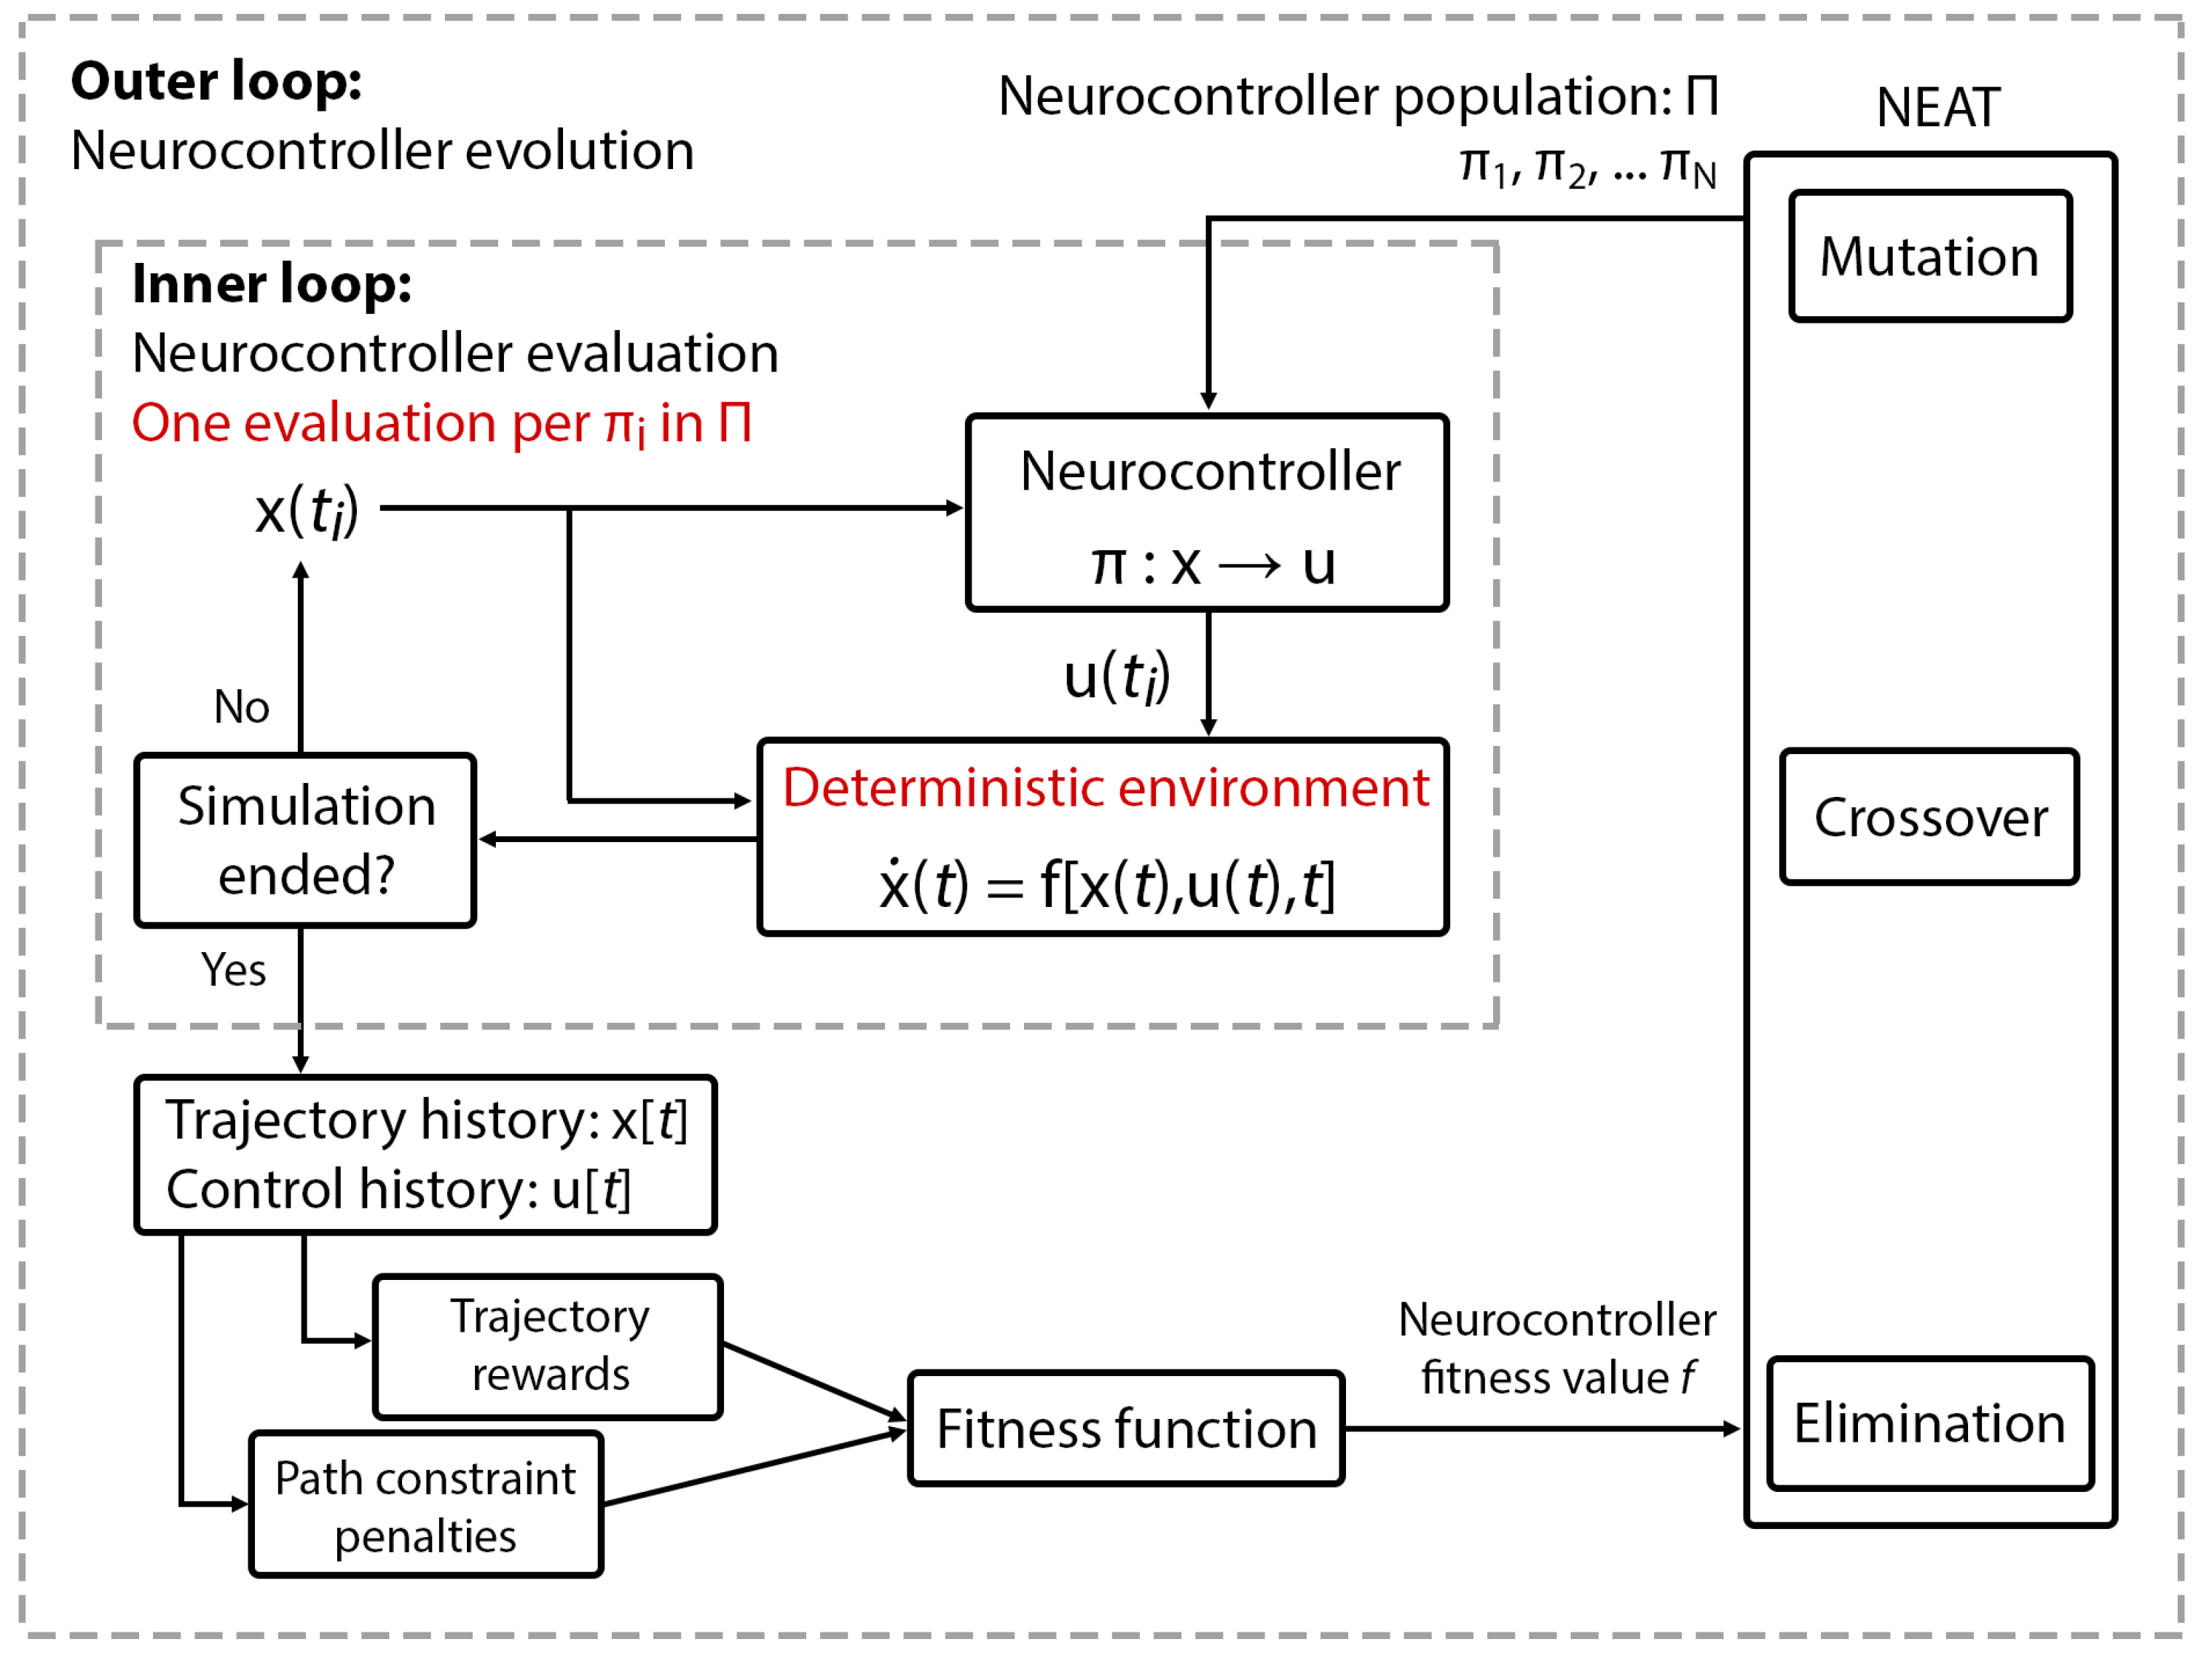





 * Deep reinforcement learning from self-play in imperfect-information games by Heinrich
  * Train models using reinforcment learning through self-play.

  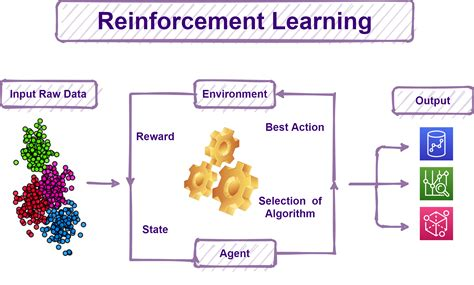

## Solution Ideas Helpful to the Team

* CFR proved to not be helpful to the team. Our class is about deep learning, specifically focused on Neural Networks. CFR can utilize neural networks at a very inefficient process and prefers trees because they are faster to utilize.
* The most useful solution idea was deep reinforcment learning.
* Our readings, specifically from Heinreich, showed that models can learn by playing itself. We decided to improve upon this by having multiple models play each other.

# New Solution Ideas

* Our ideas for our solution were to implement a DQN and train our models by pitting them against other models in a Leduc Hold'em evironment over thousands of epochs.
* Solution 1: Newer players tend to make moves at random, so putting a DQN model against a model that solely decides it's moves at random could help the model learn how to play against "worse" players.
* Solution 2: DQN vs DQN. Eventually over enough time each model would develop it's own strategy to win, and due to the competitiveness that would be formed, higher leven strategies would develop.

* Issue: Solution 2 requires a lot more hardware and time. We focused mainly on solution 1.



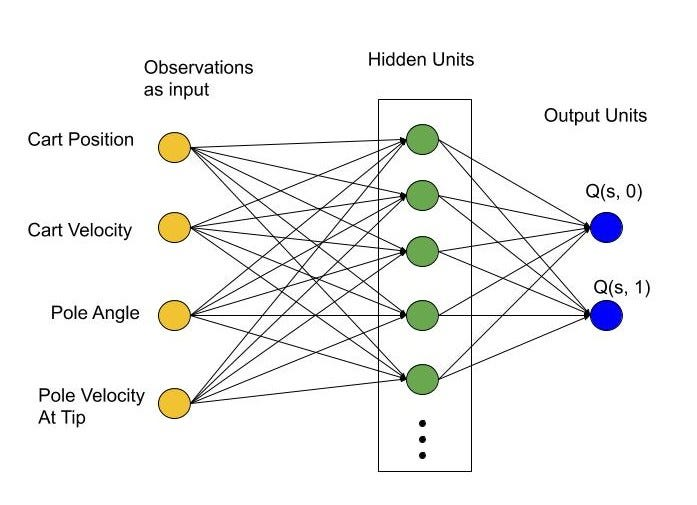

# Hardware, Software, and Data

## Hardware, Software, and Data Needs
* Moderately Poweful PC
*  Nvidia GPU, of the RTX family line or higher.
* For this project we just used google colab
* Large scale storage
  * Installation of python and required libraries and conda environments can easily exceed 10gb of storage.

## Software System Diagram

* Each agent will be passed observations from the evironment
* Observations:
  * The community card
  * How much the other player has bet
  * Their own card

* Agent 1, the DQN would then go through it's network to provide an action.
* Agent 2, being a completely random agent, would randomly select an action out of the possible actions array.



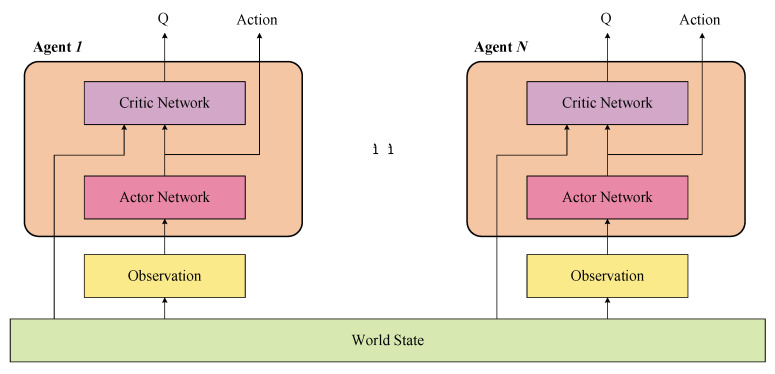

## Significant Software Tasks Accomplished

* Able to utilize our code on lower end PC's

# Future Work

<table>
  <tr>
    <th>Team Member Name</th>
    <th>Team Member Tasks</th>
  </tr>
  <tr>
    <td>David Vaughn</td>
    <td>
        <ul>
            <li>Optimization of DQN</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td>Jacob Kintigh</td>
    <td>
        <ul>
            <li>Implementation of CFR with Neural Networks</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td>Jase Bradely</td>
    <td>
        <ul>
            <li>Implementation of Texas Hold'em</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td>Cameron Alonzo</td>
    <td>
        <ul>
            <li>Research Monte CarloCFR</li>
        </ul>
    </td>
  </tr>
</table>

# Team Report

<table>
  <tr>
    <th>Team Member Name</th>
    <th>Team Member Tasks</th>
  </tr>
  <tr>
    <td>David Vaughn</td>
    <td>
        <ul>
            <li>Research of the DQN networks</li>
            <li>Compiled list of sources about DQN</li>
            <li>Drafted the DQN model</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td>Jacob Kintigh</td>
    <td>
        <ul>
            <li>Research of Conterfactual Regret Minimization</li>
            <li>Compiled list of sources about CFR</li>
            <li>Implemented the Random Model</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td>Jase Bradely</td>
    <td>
        <ul>
            <li>Research about environments to run Leduc Hold'em</li>
            <li>Implementation of the RLCard Leduc Hold'em</li>
            <li>Attempted DQN v DQN</li>
        </ul>
    </td>
  </tr>
  <tr>
    <td>Cameron Alonzo</td>
    <td>
        <ul>
            <li>Outlined possible Agent vs Agent solutions</li>
            <li>Research on CFR and state of the art solutions</li>
            <li>Diagrammed Systems</li>
        </ul>
    </td>
  </tr>
</table>

# Appendix

## Reference List

Zinkevich, Martin, et al. "Regret minimization in games with incomplete information." Advances in neural information processing systems. 2008.


Tammelin, Oskari, et al. "Solving Heads-Up Limit Texas Hold'em." IJCAI.dc 2015.


Lanctot, Marc, et al. "Monte Carlo sampling for regret minimization in extensive games." Advances in neural information processing systems. 2009.


Heinrich, Johannes, and David Silver. "Deep reinforcement learning from self-play in imperfect-information games." arXiv preprint arXiv:1603.01121 (2016).


Srinivasan, Sriram, et al. "Actor-critic policy optimization in partially observable multiagent environments." Advances in Neural Information Processing Systems. 2018.


Brown, Noam, et al. "Deep Counterfactual Regret Minimization." arXiv preprint arXiv:1811.00164 (2018).


Lisy, Viliam, and Michael Bowling. "Equilibrium Approximation Quality of Current No-Limit Poker Bots." arXiv preprint arXiv:1612.07547 (2016).


Steinberger, Eric. "Single Deep Counterfactual Regret Minimization." arXiv preprint arXiv:1901.07621 (2019).


Wang, Ziyu, et al. "Dueling network architectures for deep reinforcement learning." arXiv preprint arXiv:1511.06581 (2015).


Zinkevich, Martin, et al. "Regret minimization in games with incomplete information." Advances in neural information processing systems. 2008.


Tammelin, Oskari. "Solving large imperfect information games using CFR+." arXiv preprint arXiv:1407.5042 (2014).


Brown, Noam, and Tuomas Sandholm. "Solving Imperfect-Information Games via Discounted Regret Minimization." arXiv preprint arXiv:1809.04040 (2018).

Richard Gibson, Neil Burch, Marc Lanctot, and Duane Szafron. "Efficient Monte Carlo Counterfactual Regret Minimization in Games with Many Player Actions",


# Software

In [ ]:
#Cells for the well organized and documented code

In [ ]:
!pip install rlcard[torch]


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.0/269.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.7 MB/s eta 0:00:00
  Created wheel for rlcard: filename=rlcard-1.2.0-py3-none-any.whl size=325794 sha256=fc61b7d118502f94d97de54c1e9e3d589c5742f8028eafe57d77176bece4f5f7
  Stored in directory: /root/.cache/pip/wheels/a5/0a/39/26d73b035027276e526bec94b0217ed799109d7890c34a7d9b
Successfully built rlcard


In [ ]:
import rlcard
from rlcard.agents import *

In [ ]:
env = rlcard.make(
        'leduc-holdem',
        config={
            'allow_step_back': True,
        }
    )

In [ ]:
print("Number of actions:", env.num_actions)
print("Number of players:", env.num_players)
print("Shape of state:", env.state_shape)
print("Shape of action:", env.action_shape)

Number of actions: 4
Number of players: 2
Shape of state: [[36], [36]]
Shape of action: [None, None]


In [ ]:
agent = DQNAgent(
    num_actions=env.num_actions,
    state_shape=env.state_shape[0],
    mlp_layers=[64,64],
    save_path=".//experiments//",
    save_every=100
)
random_agent = RandomAgent(num_actions=env.num_actions)


In [ ]:
env.set_agents([agent,random_agent])



In [ ]:
from rlcard.utils import (
    tournament,
    reorganize,
    Logger,
    plot_curve,
)


In [ ]:
with Logger("experiments/leduc_holdem_dqn_result/") as logger:
    for episode in range(1000):

        # Generate data from the environment
        trajectories, payoffs = env.run(is_training=True)

        # Reorganaize the data to be state, action, reward, next_state, done
        trajectories = reorganize(trajectories, payoffs)

        # Feed transitions into agent memory, and train the agent
        for ts in trajectories[0]:
            agent.feed(ts)

        # Evaluate the performance.
        if episode % 50 == 0:
            logger.log_performance(
                env.timestep,
                tournament(
                    env,
                    10000,
                )[0]
            )

    # Get the paths
    csv_path, fig_path = logger.csv_path, logger.fig_path


----------------------------------------
  episode      |  1
  reward       |  0.7641
----------------------------------------

----------------------------------------
  episode      |  34737
  reward       |  0.81235
----------------------------------------
INFO - Step 100, rl-loss: 2.360525131225586
INFO - Copied model parameters to target network.
INFO - Step 125, rl-loss: 2.360395669937134
----------------------------------------
  episode      |  69290
  reward       |  0.2263
----------------------------------------
INFO - Step 196, rl-loss: 2.8701040744781494
----------------------------------------
  episode      |  98287
  reward       |  0.2921
----------------------------------------
INFO - Step 199, rl-loss: 1.4435025453567505
INFO - Saved model checkpoint.
INFO - Step 278, rl-loss: 2.263084650039673
----------------------------------------
  episode      |  127152
  reward       |  0.4869
----------------------------------------
INFO - Step 299, rl-loss: 1.97878849506378

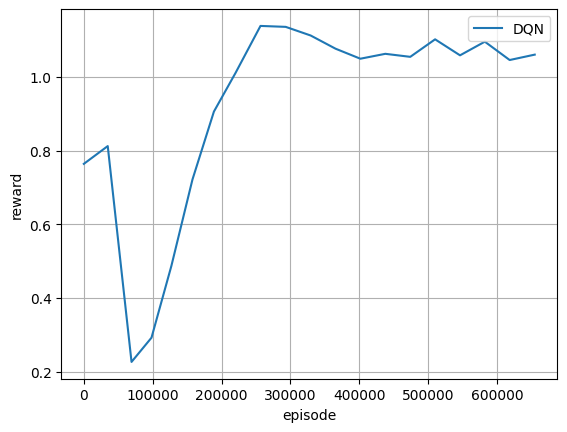

In [ ]:
plot_curve(csv_path, fig_path, "DQN")

In [ ]:
import rlcard
from rlcard import models
from rlcard.agents import LeducholdemHumanAgent as HumanAgent
from rlcard.utils import print_card

In [ ]:
env = rlcard.make('leduc-holdem')
human_agent = HumanAgent(env.num_actions)
env.set_agents([
    human_agent,
    agent,
])

In [ ]:
print(">> Leduc Hold'em pre-trained model")

while (True):
    print(">> Start a new game")

    trajectories, payoffs = env.run(is_training=False)
    # If the human does not take the final action, we need to
    # print other players action
    final_state = trajectories[0][-1]
    action_record = final_state['action_record']
    state = final_state['raw_obs']
    _action_list = []
    for i in range(1, len(action_record)+1):
        if action_record[-i][0] == state['current_player']:
            break
        _action_list.insert(0, action_record[-i])
    for pair in _action_list:
        print('>> Player', pair[0], 'chooses', pair[1])

    # Let's take a look at what the agent card is
    print('===============     CFR Agent    ===============')
    print_card(env.get_perfect_information()['hand_cards'][1])

    print('===============     Result     ===============')
    if payoffs[0] > 0:
        print('You win {} chips!'.format(payoffs[0]))
    elif payoffs[0] == 0:
        print('It is a tie.')
    else:
        print('You lose {} chips!'.format(-payoffs[0]))
    print('')

    inputs = input("Press any key to continue, Q to exit\n")
    if inputs.lower() == "q":
      break

>> Leduc Hold'em pre-trained model
>> Start a new game

=============== Community Card ===============
┌─────────┐
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│Q        │
│         │
│         │
│    ♠    │
│         │
│         │
│        Q│
└─────────┘
===============     Chips      ===============
Yours:   +
Agent 1: ++
=========== Actions You Can Choose ===========
0: call, 1: raise, 2: fold

>> You choose action (integer): 1
>> Player 1 chooses raise

=============== Community Card ===============
┌─────────┐
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
│░░░░░░░░░│
└─────────┘
===============   Your Hand    ===============
┌─────────┐
│Q        │
│         │
│         │
│    ♠    │
│         │
│         │
│        Q│
└─────────┘
===============     Chips      ===============
Yours:   ++++
Agent 1: ++++++
=========== Actions You Can Choose ======

In [ ]:
''' DQN agent

The code is derived from https://github.com/dennybritz/reinforcement-learning/blob/master/DQN/dqn.py

Copyright (c) 2019 Matthew Judell
Copyright (c) 2019 DATA Lab at Texas A&M University
Copyright (c) 2016 Denny Britz

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
'''

import os
import random
import numpy as np
import torch
import torch.nn as nn
from collections import namedtuple
from copy import deepcopy

from rlcard.utils.utils import remove_illegal

Transition = namedtuple('Transition', ['state', 'action', 'reward', 'next_state', 'done', 'legal_actions'])


class DQNAgent(object):
    '''
    Approximate clone of rlcard.agents.dqn_agent.DQNAgent
    that depends on PyTorch instead of Tensorflow
    '''
    def __init__(self,
                 replay_memory_size=20000,
                 replay_memory_init_size=100,
                 update_target_estimator_every=1000,
                 discount_factor=0.99,
                 epsilon_start=1.0,
                 epsilon_end=0.1,
                 epsilon_decay_steps=20000,
                 batch_size=32,
                 num_actions=2,
                 state_shape=None,
                 train_every=1,
                 mlp_layers=None,
                 learning_rate=0.00005,
                 device=None,
                 save_path=None,
                 save_every=float('inf'),):

        '''
        Q-Learning algorithm for off-policy TD control using Function Approximation.
        Finds the optimal greedy policy while following an epsilon-greedy policy.

        Args:
            replay_memory_size (int): Size of the replay memory
            replay_memory_init_size (int): Number of random experiences to sample when initializing
              the reply memory.
            update_target_estimator_every (int): Copy parameters from the Q estimator to the
              target estimator every N steps
            discount_factor (float): Gamma discount factor
            epsilon_start (float): Chance to sample a random action when taking an action.
              Epsilon is decayed over time and this is the start value
            epsilon_end (float): The final minimum value of epsilon after decaying is done
            epsilon_decay_steps (int): Number of steps to decay epsilon over
            batch_size (int): Size of batches to sample from the replay memory
            evaluate_every (int): Evaluate every N steps
            num_actions (int): The number of the actions
            state_space (list): The space of the state vector
            train_every (int): Train the network every X steps.
            mlp_layers (list): The layer number and the dimension of each layer in MLP
            learning_rate (float): The learning rate of the DQN agent.
            device (torch.device): whether to use the cpu or gpu
            save_path (str): The path to save the model checkpoints
            save_every (int): Save the model every X training steps
        '''
        self.use_raw = False
        self.replay_memory_init_size = replay_memory_init_size
        self.update_target_estimator_every = update_target_estimator_every
        self.discount_factor = discount_factor
        self.epsilon_decay_steps = epsilon_decay_steps
        self.batch_size = batch_size
        self.num_actions = num_actions
        self.train_every = train_every

        # Torch device
        if device is None:
            self.device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
        else:
            self.device = device

        # Total timesteps
        self.total_t = 0

        # Total training step
        self.train_t = 0

        # The epsilon decay scheduler
        self.epsilons = np.linspace(epsilon_start, epsilon_end, epsilon_decay_steps)

        # Create estimators
        self.q_estimator = Estimator(num_actions=num_actions, learning_rate=learning_rate, state_shape=state_shape, \
            mlp_layers=mlp_layers, device=self.device)
        self.target_estimator = Estimator(num_actions=num_actions, learning_rate=learning_rate, state_shape=state_shape, \
            mlp_layers=mlp_layers, device=self.device)

        # Create replay memory
        self.memory = Memory(replay_memory_size, batch_size)

        # Checkpoint saving parameters
        self.save_path = save_path
        self.save_every = save_every

    def feed(self, ts):
        ''' Store data in to replay buffer and train the agent. There are two stages.
            In stage 1, populate the memory without training
            In stage 2, train the agent every several timesteps

        Args:
            ts (list): a list of 5 elements that represent the transition
        '''
        (state, action, reward, next_state, done) = tuple(ts)
        self.feed_memory(state['obs'], action, reward, next_state['obs'], list(next_state['legal_actions'].keys()), done)
        self.total_t += 1
        tmp = self.total_t - self.replay_memory_init_size
        if tmp>=0 and tmp%self.train_every == 0:
            self.train()

    def step(self, state):
        ''' Predict the action for genrating training data but
            have the predictions disconnected from the computation graph

        Args:
            state (numpy.array): current state

        Returns:
            action (int): an action id
        '''
        q_values = self.predict(state)
        epsilon = self.epsilons[min(self.total_t, self.epsilon_decay_steps-1)]
        legal_actions = list(state['legal_actions'].keys())
        probs = np.ones(len(legal_actions), dtype=float) * epsilon / len(legal_actions)
        best_action_idx = legal_actions.index(np.argmax(q_values))
        probs[best_action_idx] += (1.0 - epsilon)
        action_idx = np.random.choice(np.arange(len(probs)), p=probs)

        return legal_actions[action_idx]

    def eval_step(self, state):
        ''' Predict the action for evaluation purpose.

        Args:
            state (numpy.array): current state

        Returns:
            action (int): an action id
            info (dict): A dictionary containing information
        '''
        q_values = self.predict(state)
        best_action = np.argmax(q_values)

        info = {}
        info['values'] = {state['raw_legal_actions'][i]: float(q_values[list(state['legal_actions'].keys())[i]]) for i in range(len(state['legal_actions']))}

        return best_action, info

    def predict(self, state):
        ''' Predict the masked Q-values

        Args:
            state (numpy.array): current state

        Returns:
            q_values (numpy.array): a 1-d array where each entry represents a Q value
        '''

        q_values = self.q_estimator.predict_nograd(np.expand_dims(state['obs'], 0))[0]
        masked_q_values = -np.inf * np.ones(self.num_actions, dtype=float)
        legal_actions = list(state['legal_actions'].keys())
        masked_q_values[legal_actions] = q_values[legal_actions]

        return masked_q_values

    def train(self):
        ''' Train the network

        Returns:
            loss (float): The loss of the current batch.
        '''
        state_batch, action_batch, reward_batch, next_state_batch, done_batch, legal_actions_batch = self.memory.sample()

        # Calculate best next actions using Q-network (Double DQN)
        q_values_next = self.q_estimator.predict_nograd(next_state_batch)
        legal_actions = []
        for b in range(self.batch_size):
            legal_actions.extend([i + b * self.num_actions for i in legal_actions_batch[b]])
        masked_q_values = -np.inf * np.ones(self.num_actions * self.batch_size, dtype=float)
        masked_q_values[legal_actions] = q_values_next.flatten()[legal_actions]
        masked_q_values = masked_q_values.reshape((self.batch_size, self.num_actions))
        best_actions = np.argmax(masked_q_values, axis=1)

        # Evaluate best next actions using Target-network (Double DQN)
        q_values_next_target = self.target_estimator.predict_nograd(next_state_batch)
        target_batch = reward_batch + np.invert(done_batch).astype(np.float32) * \
            self.discount_factor * q_values_next_target[np.arange(self.batch_size), best_actions]

        # Perform gradient descent update
        state_batch = np.array(state_batch)

        loss = self.q_estimator.update(state_batch, action_batch, target_batch)
        print('\rINFO - Step {}, rl-loss: {}'.format(self.total_t, loss), end='')

        # Update the target estimator
        if self.train_t % self.update_target_estimator_every == 0:
            self.target_estimator = deepcopy(self.q_estimator)
            print("\nINFO - Copied model parameters to target network.")

        self.train_t += 1

        if self.save_path and self.train_t % self.save_every == 0:
            # To preserve every checkpoint separately,
            # add another argument to the function call parameterized by self.train_t
            self.save_checkpoint(self.save_path)
            print("\nINFO - Saved model checkpoint.")


    def feed_memory(self, state, action, reward, next_state, legal_actions, done):
        ''' Feed transition to memory

        Args:
            state (numpy.array): the current state
            action (int): the performed action ID
            reward (float): the reward received
            next_state (numpy.array): the next state after performing the action
            legal_actions (list): the legal actions of the next state
            done (boolean): whether the episode is finished
        '''
        self.memory.save(state, action, reward, next_state, legal_actions, done)

    def set_device(self, device):
        self.device = device
        self.q_estimator.device = device
        self.target_estimator.device = device

    def checkpoint_attributes(self):
        '''
        Return the current checkpoint attributes (dict)
        Checkpoint attributes are used to save and restore the model in the middle of training
        Saves the model state dict, optimizer state dict, and all other instance variables
        '''

        return {
            'agent_type': 'DQNAgent',
            'q_estimator': self.q_estimator.checkpoint_attributes(),
            'memory': self.memory.checkpoint_attributes(),
            'total_t': self.total_t,
            'train_t': self.train_t,
            'replay_memory_init_size': self.replay_memory_init_size,
            'update_target_estimator_every': self.update_target_estimator_every,
            'discount_factor': self.discount_factor,
            'epsilon_start': self.epsilons.min(),
            'epsilon_end': self.epsilons.max(),
            'epsilon_decay_steps': self.epsilon_decay_steps,
            'batch_size': self.batch_size,
            'num_actions': self.num_actions,
            'train_every': self.train_every,
            'device': self.device,
            'save_path': self.save_path,
            'save_every': self.save_every
        }

    @classmethod
    def from_checkpoint(cls, checkpoint):
        '''
        Restore the model from a checkpoint

        Args:
            checkpoint (dict): the checkpoint attributes generated by checkpoint_attributes()
        '''

        print("\nINFO - Restoring model from checkpoint...")
        agent_instance = cls(
            replay_memory_size=checkpoint['memory']['memory_size'],
            replay_memory_init_size=checkpoint['replay_memory_init_size'],
            update_target_estimator_every=checkpoint['update_target_estimator_every'],
            discount_factor=checkpoint['discount_factor'],
            epsilon_start=checkpoint['epsilon_start'],
            epsilon_end=checkpoint['epsilon_end'],
            epsilon_decay_steps=checkpoint['epsilon_decay_steps'],
            batch_size=checkpoint['batch_size'],
            num_actions=checkpoint['num_actions'],
            state_shape=checkpoint['q_estimator']['state_shape'],
            train_every=checkpoint['train_every'],
            mlp_layers=checkpoint['q_estimator']['mlp_layers'],
            learning_rate=checkpoint['q_estimator']['learning_rate'],
            device=checkpoint['device'],
            save_path=checkpoint['save_path'],
            save_every=checkpoint['save_every'],
        )

        agent_instance.total_t = checkpoint['total_t']
        agent_instance.train_t = checkpoint['train_t']

        agent_instance.q_estimator = Estimator.from_checkpoint(checkpoint['q_estimator'])
        agent_instance.target_estimator = deepcopy(agent_instance.q_estimator)
        agent_instance.memory = Memory.from_checkpoint(checkpoint['memory'])

        return agent_instance

    def save_checkpoint(self, path, filename='checkpoint_dqn.pt'):
        ''' Save the model checkpoint (all attributes)

        Args:
            path (str): the path to save the model
            filename(str): the file name of checkpoint
        '''
        torch.save(self.checkpoint_attributes(), os.path.join(path, filename))


class Estimator(object):
    '''
    Approximate clone of rlcard.agents.dqn_agent.Estimator that
    uses PyTorch instead of Tensorflow.  All methods input/output np.ndarray.

    Q-Value Estimator neural network.
    This network is used for both the Q-Network and the Target Network.
    '''

    def __init__(self, num_actions=2, learning_rate=0.001, state_shape=None, mlp_layers=None, device=None):
        ''' Initilalize an Estimator object.

        Args:
            num_actions (int): the number output actions
            state_shape (list): the shape of the state space
            mlp_layers (list): size of outputs of mlp layers
            device (torch.device): whether to use cpu or gpu
        '''
        self.num_actions = num_actions
        self.learning_rate=learning_rate
        self.state_shape = state_shape
        self.mlp_layers = mlp_layers
        self.device = device

        # set up Q model and place it in eval mode
        qnet = EstimatorNetwork(num_actions, state_shape, mlp_layers)
        qnet = qnet.to(self.device)
        self.qnet = qnet
        self.qnet.eval()

        # initialize the weights using Xavier init
        for p in self.qnet.parameters():
            if len(p.data.shape) > 1:
                nn.init.xavier_uniform_(p.data)

        # set up loss function
        self.mse_loss = nn.MSELoss(reduction='mean')

        # set up optimizer
        self.optimizer =  torch.optim.Adam(self.qnet.parameters(), lr=self.learning_rate)

    def predict_nograd(self, s):
        ''' Predicts action values, but prediction is not included
            in the computation graph.  It is used to predict optimal next
            actions in the Double-DQN algorithm.

        Args:
          s (np.ndarray): (batch, state_len)

        Returns:
          np.ndarray of shape (batch_size, NUM_VALID_ACTIONS) containing the estimated
          action values.
        '''
        with torch.no_grad():
            s = torch.from_numpy(s).float().to(self.device)
            q_as = self.qnet(s).cpu().numpy()
        return q_as

    def update(self, s, a, y):
        ''' Updates the estimator towards the given targets.
            In this case y is the target-network estimated
            value of the Q-network optimal actions, which
            is labeled y in Algorithm 1 of Minh et al. (2015)

        Args:
          s (np.ndarray): (batch, state_shape) state representation
          a (np.ndarray): (batch,) integer sampled actions
          y (np.ndarray): (batch,) value of optimal actions according to Q-target

        Returns:
          The calculated loss on the batch.
        '''
        self.optimizer.zero_grad()

        self.qnet.train()

        s = torch.from_numpy(s).float().to(self.device)
        a = torch.from_numpy(a).long().to(self.device)
        y = torch.from_numpy(y).float().to(self.device)

        # (batch, state_shape) -> (batch, num_actions)
        q_as = self.qnet(s)

        # (batch, num_actions) -> (batch, )
        Q = torch.gather(q_as, dim=-1, index=a.unsqueeze(-1)).squeeze(-1)

        # update model
        batch_loss = self.mse_loss(Q, y)
        batch_loss.backward()
        self.optimizer.step()
        batch_loss = batch_loss.item()

        self.qnet.eval()

        return batch_loss

    def checkpoint_attributes(self):
        ''' Return the attributes needed to restore the model from a checkpoint
        '''
        return {
            'qnet': self.qnet.state_dict(),
            'optimizer': self.optimizer.state_dict(),
            'num_actions': self.num_actions,
            'learning_rate': self.learning_rate,
            'state_shape': self.state_shape,
            'mlp_layers': self.mlp_layers,
            'device': self.device
        }

    @classmethod
    def from_checkpoint(cls, checkpoint):
        ''' Restore the model from a checkpoint
        '''
        estimator = cls(
            num_actions=checkpoint['num_actions'],
            learning_rate=checkpoint['learning_rate'],
            state_shape=checkpoint['state_shape'],
            mlp_layers=checkpoint['mlp_layers'],
            device=checkpoint['device']
        )

        estimator.qnet.load_state_dict(checkpoint['qnet'])
        estimator.optimizer.load_state_dict(checkpoint['optimizer'])
        return estimator


class EstimatorNetwork(nn.Module):
    ''' The function approximation network for Estimator
        It is just a series of tanh layers. All in/out are torch.tensor
    '''

    def __init__(self, num_actions=2, state_shape=None, mlp_layers=None):
        ''' Initialize the Q network

        Args:
            num_actions (int): number of legal actions
            state_shape (list): shape of state tensor
            mlp_layers (list): output size of each fc layer
        '''
        super(EstimatorNetwork, self).__init__()

        self.num_actions = num_actions
        self.state_shape = state_shape
        self.mlp_layers = mlp_layers

        # build the Q network
        layer_dims = [np.prod(self.state_shape)] + self.mlp_layers
        fc = [nn.Flatten()]
        fc.append(nn.BatchNorm1d(layer_dims[0]))
        for i in range(len(layer_dims)-1):
            fc.append(nn.Linear(layer_dims[i], layer_dims[i+1], bias=True))
            fc.append(nn.Tanh())
        fc.append(nn.Linear(layer_dims[-1], self.num_actions, bias=True))
        self.fc_layers = nn.Sequential(*fc)

    def forward(self, s):
        ''' Predict action values

        Args:
            s  (Tensor): (batch, state_shape)
        '''
        return self.fc_layers(s)

class Memory(object):
    ''' Memory for saving transitions
    '''

    def __init__(self, memory_size, batch_size):
        ''' Initialize
        Args:
            memory_size (int): the size of the memroy buffer
        '''
        self.memory_size = memory_size
        self.batch_size = batch_size
        self.memory = []

    def save(self, state, action, reward, next_state, legal_actions, done):
        ''' Save transition into memory

        Args:
            state (numpy.array): the current state
            action (int): the performed action ID
            reward (float): the reward received
            next_state (numpy.array): the next state after performing the action
            legal_actions (list): the legal actions of the next state
            done (boolean): whether the episode is finished
        '''
        if len(self.memory) == self.memory_size:
            self.memory.pop(0)
        transition = Transition(state, action, reward, next_state, done, legal_actions)
        self.memory.append(transition)

    def sample(self):
        ''' Sample a minibatch from the replay memory

        Returns:
            state_batch (list): a batch of states
            action_batch (list): a batch of actions
            reward_batch (list): a batch of rewards
            next_state_batch (list): a batch of states
            done_batch (list): a batch of dones
        '''
        samples = random.sample(self.memory, self.batch_size)
        samples = tuple(zip(*samples))
        return tuple(map(np.array, samples[:-1])) + (samples[-1],)

    def checkpoint_attributes(self):
        ''' Returns the attributes that need to be checkpointed
        '''

        return {
            'memory_size': self.memory_size,
            'batch_size': self.batch_size,
            'memory': self.memory
        }

    @classmethod
    def from_checkpoint(cls, checkpoint):
        '''
        Restores the attributes from the checkpoint

        Args:
            checkpoint (dict): the checkpoint dictionary

        Returns:
            instance (Memory): the restored instance
        '''

        instance = cls(checkpoint['memory_size'], checkpoint['batch_size'])
        instance.memory = checkpoint['memory']
        return instance